In [1]:
from deepdream import DeepDream

import PIL.Image
from torchvision.models import inception_v3, Inception_V3_Weights

In [2]:
wandb_config = {
    "name": "deepdream_inception_v3",
    "project": "deepdream",
}
wandb_config = None
base_model = inception_v3(weights=Inception_V3_Weights.DEFAULT, transform_input=True)

In [3]:
block_names_to_select = ["Mixed_5b", "Mixed_5c", "Mixed_5d"]
dd = DeepDream(base_model, block_names_to_select, wandb_logger_config=wandb_config)

2024-06-23 14:30:08 - DeepDream - INFO - Using Device: cpu
2024-06-23 14:30:08 - DeepDreamModel - INFO - Indices of layers: [25, 39, 53]
2024-06-23 14:30:08 - DeepDreamModel - INFO - Layers used for activations hooks: ['Mixed_5b', 'Mixed_5c', 'Mixed_5d']


In [4]:
sample_image = PIL.Image.open("sample_images/sky1024px.jpg")
sample_image.size

(1024, 575)

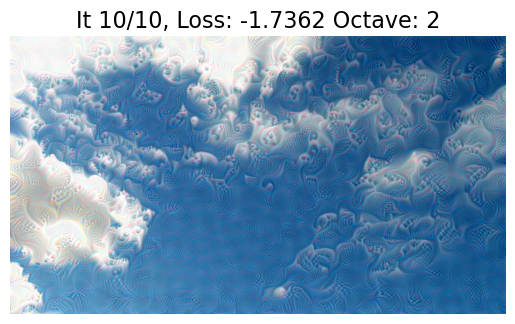

In [5]:
dreamed = dd.dream(
    sample_image,
    iterations=10,
    lr=0.01,
    octaves=[-2, -1, 0, 1, 2],
    loss_type="mean",
    plot_image_interval=5,
)

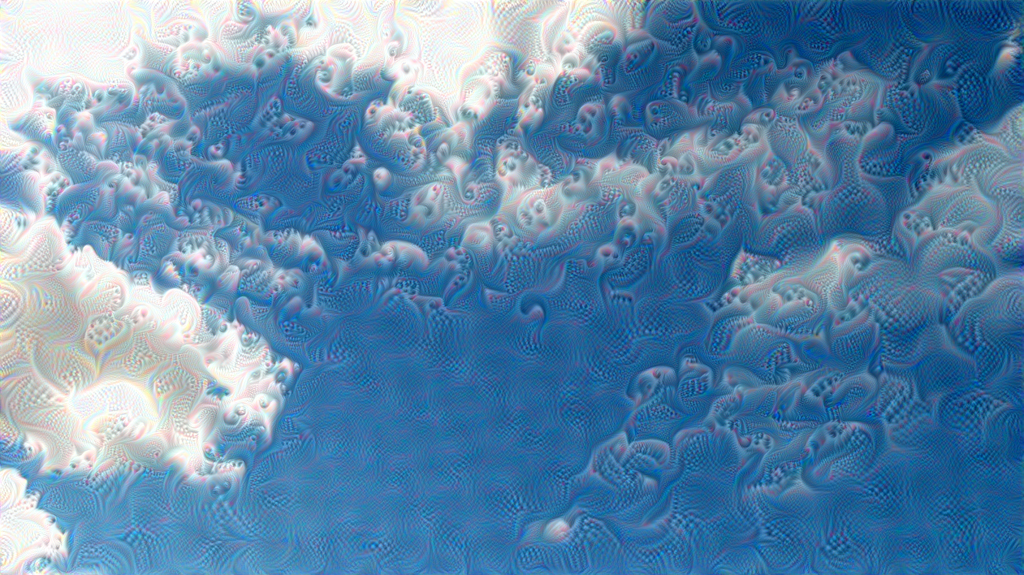

In [6]:
dreamed